Author: 

In [1]:
!pip install deepdiff
!pip install pyLDAvis

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

## Import and clean data

### 1. DKU course data

1.1 all courses

In [3]:
dku_crs_df = pd.read_csv("X:/dataset/duke_dku/dku_courses/all.csv")
dku_crs_df

,ID,Credit,Title,Description
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi..."
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...
...,...,...,...,...
541,LIT 301,4.0,The Realist Moment,\t\t\t\t\t\t\tThis course focuses primarily on...
542,USTUD 301,4.0,The Western Across Boundaries,\t\t\t\t\t\t\tThis course studies the film gen...
543,LIT 305,4.0,U.S. & Contemp Global Imaginat,\t\t\t\t\t\t\tThis course treats issues of the...
544,PUBPOL 216,4.0,Civic Part & Public Policy,\t\t\t\t\t\t\tOverview of patterns in American...


<AxesSubplot:>

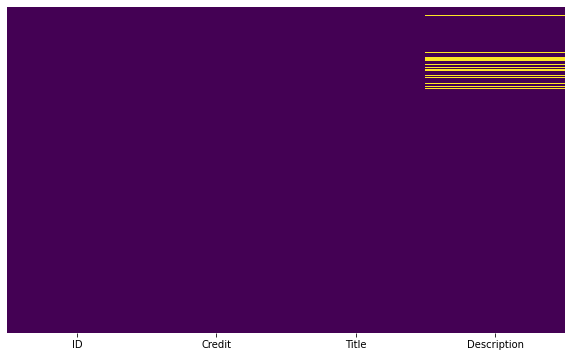

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(dku_crs_df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

1.2 separate files: courses for each track

In [5]:
# print the list
path = "X:/dataset/duke_dku/dku_courses/dku_course_track"
csv_files = glob.glob(os.path.join(path, "*.csv")) # in the folder
df_list = []
track_list = []

for f in csv_files:
    # f is the location; read the csv file
    df = pd.read_csv(f)
    df_name = f.split("\\")[-1]
    track_list.append(df_name[:-4]) # 
    df['major_track'] = df_name[:-4] # add track name; remove ".csv"
    df_list.append(df) 
    
    display(df)

,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,applied-mathematics-and-computational-sciences...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,applied-mathematics-and-computational-sciences...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,applied-mathematics-and-computational-sciences...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",applied-mathematics-and-computational-sciences...
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,applied-mathematics-and-computational-sciences...
5,STATS 102,4.0,Introduction to Data Science,\t\t\t\t\t\t\tAs an introductory course in dat...,applied-mathematics-and-computational-sciences...
6,COMPSCI 101,4.0,Intro to Comp Science,\t\t\t\t\t\t\tAs an introductory course for co...,applied-mathematics-and-computational-sciences...
7,MATH 201,4.0,Multivariable Calculus,\t\t\t\t\t\t\tMain topics of this course inclu...,applied-mathematics-and-computational-sciences...
8,MATH 202,4.0,Linear Algebra,\t\t\t\t\t\t\tSystems of linear equations and ...,applied-mathematics-and-computational-sciences...
9,MATH 205,4.0,Probability and Statistics,\t\t\t\t\t\t\tThe fundamental concepts and too...,applied-mathematics-and-computational-sciences...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,behavioral-science-with-tracks-in-psychology-a...
1,STATS 101,4.0,Intro Appl Statistical Methods,\t\t\t\t\t\t\tThis course will introduce stude...,behavioral-science-with-tracks-in-psychology-a...
2,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,behavioral-science-with-tracks-in-psychology-a...
3,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,behavioral-science-with-tracks-in-psychology-a...
4,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,behavioral-science-with-tracks-in-psychology-a...
5,BEHAVSCI 101,4.0,Introduction to Behavioral Sci,\t\t\t\t\t\t\tThis course provides a broad ove...,behavioral-science-with-tracks-in-psychology-a...
6,BEHAVSCI 102,4.0,Mechanisms of Human Behavior,\t\t\t\t\t\t\tThis course introduces students ...,behavioral-science-with-tracks-in-psychology-a...
7,BEHAVSCI 201,4.0,Individuals and Their Decision,"\t\t\t\t\t\t\tThis course is a team-taught, qu...",behavioral-science-with-tracks-in-psychology-a...
8,BEHAVSCI 202,4.0,"Institutions, Groups, Society","\t\t\t\t\t\t\tThrough this course, students wi...",behavioral-science-with-tracks-in-psychology-a...
9,PSYCH 101,4.0,Introductory Psychology,\t\t\t\t\t\t\tBroad survey of the field of mod...,behavioral-science-with-tracks-in-psychology-a...


,ID,Credit,Title,Description,major_track
0,MATH 205,4.0,Probability and Statistics,\t\t\t\t\t\t\tThe fundamental concepts and too...,computation-and-design-with-tracks-in-computer...
1,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,computation-and-design-with-tracks-in-computer...
2,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,computation-and-design-with-tracks-in-computer...
3,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,computation-and-design-with-tracks-in-computer...
4,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",computation-and-design-with-tracks-in-computer...
...,...,...,...,...,...
97,ECON 307,4.0,Hist of Monetary & Intl Crises,\t\t\t\t\t\t\tCourse examines monetary/financi...,computation-and-design-with-tracks-in-computer...
98,SOSC 203,4.0,Implications of Immigration,\t\t\t\t\t\t\tThe regulation of labor immigrat...,computation-and-design-with-tracks-in-computer...
99,ECON 402,4.0,International Finance,\t\t\t\t\t\t\tAnalysis of the determinants of ...,computation-and-design-with-tracks-in-computer...
100,CULMOVE 201,4.0,"Migration, Inequality&Culture",\t\t\t\t\t\t\tThis course introduces the major...,computation-and-design-with-tracks-in-computer...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,cultures-and-movements-with-tracks-in-cultural...
1,SOSC 102,4.0,Intro to Research Methods,\t\t\t\t\t\t\tThis course provides students wi...,cultures-and-movements-with-tracks-in-cultural...
2,CULMOVE 301,4.0,Soc Sci Perspectives on China,\t\t\t\t\t\t\tThis is an advanced course on so...,cultures-and-movements-with-tracks-in-cultural...
3,CULMOVE 390,4.0,Junior Seminar: Adv Topics,\t\t\t\t\t\t\tThis seminar is a core component...,cultures-and-movements-with-tracks-in-cultural...
4,CULMOVE 490,4.0,Senior Seminar: Adv Topics,\t\t\t\t\t\t\tThis seminar is a core component...,cultures-and-movements-with-tracks-in-cultural...
...,...,...,...,...,...
71,GCULS 108,2.0,"Science, Culture, and Politics",\t\t\t\t\t\t\tWhat is science? Who has the aut...,cultures-and-movements-with-tracks-in-cultural...
72,HIST 317,4.0,The Global First World War,\t\t\t\t\t\t\tThis course examines the upheava...,cultures-and-movements-with-tracks-in-cultural...
73,CULANTH 315,4.0,Why Be a Bandit?,\t\t\t\t\t\t\tBandits and outlaws have histori...,cultures-and-movements-with-tracks-in-cultural...
74,HIST 206,2.0,World History in Seven Meals,\t\t\t\t\t\t\tThis course offers a study of gl...,cultures-and-movements-with-tracks-in-cultural...


,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,data-science
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,data-science
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,data-science
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",data-science
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,data-science
5,STATS 302,4.0,Principles of Machine Learning,\t\t\t\t\t\t\tThis course covers maximum likel...,data-science
6,STATS 303,4.0,Statistical Machine Learning,\t\t\t\t\t\t\tThis course covers statistical i...,data-science
7,STATS 401,4.0,Data Acquisition&Visualization,\t\t\t\t\t\t\tThis course introduces the princ...,data-science
8,STATS 402,4.0,Interdiscipl Data Analysis,\t\t\t\t\t\t\tThis course covers interdiscipli...,data-science
9,COMPSCI 201,4.0,Intro to Programming and Data,\t\t\t\t\t\t\tThis course covers data and repr...,data-science


,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,environmental-science-with-tracks-in-biogeoche...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,environmental-science-with-tracks-in-biogeoche...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,environmental-science-with-tracks-in-biogeoche...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",environmental-science-with-tracks-in-biogeoche...
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,environmental-science-with-tracks-in-biogeoche...
...,...,...,...,...,...
67,ENVIR 204,2.0,Global Envir Issues & Policies,\t\t\t\t\t\t\tThis course examines problems as...,environmental-science-with-tracks-in-biogeoche...
68,PUBPOL 220,4.0,Intro to Regulatory Gov,\t\t\t\t\t\t\tThe course will help you to unde...,environmental-science-with-tracks-in-biogeoche...
69,PUBPOL 318,4.0,Non-State Actors,\t\t\t\t\t\t\tRegulation of societal risks was...,environmental-science-with-tracks-in-biogeoche...
70,GCULS 108,2.0,"Science, Culture, and Politics",\t\t\t\t\t\t\tWhat is science? Who has the aut...,environmental-science-with-tracks-in-biogeoche...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,ethics-and-leadership-with-tracks-in-philosoph...
1,ARHU 101,4.0,Art of Interprtn:Written Texts,\t\t\t\t\t\t\tTraining in close reading and an...,ethics-and-leadership-with-tracks-in-philosoph...
2,ETHLDR 101,4.0,Ethics and Leadership,\t\t\t\t\t\t\tThis interdisciplinary course dr...,ethics-and-leadership-with-tracks-in-philosoph...
3,ETHLDR 202,4.0,"Ethics, Markets, and Politics",\t\t\t\t\t\t\tWhat should be the relation betw...,ethics-and-leadership-with-tracks-in-philosoph...
4,ETHLDR 203,4.0,Democracy and Meritocracy,\t\t\t\t\t\t\tThis course will examine democra...,ethics-and-leadership-with-tracks-in-philosoph...
...,...,...,...,...,...
64,RELIG 104,4.0,Myth and Nation,\t\t\t\t\t\t\tThis course studies the role of ...,ethics-and-leadership-with-tracks-in-philosoph...
65,RELIG 102,4.0,Prophets and Priests,\t\t\t\t\t\t\tThis course studies the relation...,ethics-and-leadership-with-tracks-in-philosoph...
66,RELIG 107,2.0,Readings in Religious Lit,\t\t\t\t\t\t\tThis course introduces students ...,ethics-and-leadership-with-tracks-in-philosoph...
67,RELIG 303,4.0,The Human Condition,\t\t\t\t\t\t\tExploration of the problem of th...,ethics-and-leadership-with-tracks-in-philosoph...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,global-china-studies-with-tracks-in-chinese-hi...
1,ARHU 101,4.0,Art of Interprtn:Written Texts,\t\t\t\t\t\t\tTraining in close reading and an...,global-china-studies-with-tracks-in-chinese-hi...
2,POLECON 302,4.0,China’s Economic Transition,\t\t\t\t\t\t\tThis course provides a comprehen...,global-china-studies-with-tracks-in-chinese-hi...
3,GCHINA 490,4.0,Senior Seminar: Adv Topics,\t\t\t\t\t\t\tThis seminar is a core component...,global-china-studies-with-tracks-in-chinese-hi...
4,GCHINA 201,4.0,From Empire to Nation,\t\t\t\t\t\t\tThis course examines concepts an...,global-china-studies-with-tracks-in-chinese-hi...
...,...,...,...,...,...
106,RELIG 104,4.0,Myth and Nation,\t\t\t\t\t\t\tThis course studies the role of ...,global-china-studies-with-tracks-in-chinese-hi...
107,RELIG 102,4.0,Prophets and Priests,\t\t\t\t\t\t\tThis course studies the relation...,global-china-studies-with-tracks-in-chinese-hi...
108,RELIG 107,2.0,Readings in Religious Lit,\t\t\t\t\t\t\tThis course introduces students ...,global-china-studies-with-tracks-in-chinese-hi...
109,RELIG 303,4.0,The Human Condition,\t\t\t\t\t\t\tExploration of the problem of th...,global-china-studies-with-tracks-in-chinese-hi...


,ID,Credit,Title,Description,major_track
0,ARHU 101,4.0,Art of Interprtn:Written Texts,\t\t\t\t\t\t\tTraining in close reading and an...,global-cultural-studies-with-tracks-in-world-h...
1,ARHU 102,4.0,Art of Interprtn: Images/Sound,\t\t\t\t\t\t\tThis class will train students t...,global-cultural-studies-with-tracks-in-world-h...
2,CULMOVE 201,4.0,"Migration, Inequality&Culture",\t\t\t\t\t\t\tThis course introduces the major...,global-cultural-studies-with-tracks-in-world-h...
3,GCULS 201,4.0,Culture and Industry,\t\t\t\t\t\t\tApple is currently the most valu...,global-cultural-studies-with-tracks-in-world-h...
4,GCULS 202,4.0,Empires and Culture,"\t\t\t\t\t\t\tIn 1800, Europeans controlled 35...",global-cultural-studies-with-tracks-in-world-h...
...,...,...,...,...,...
61,POLSCI 211,4.0,Politics and Literature,"\t\t\t\t\t\t\tIn the past, the poet was regard...",global-cultural-studies-with-tracks-in-world-h...
62,LIT 211,4.0,Politics and Literature,"\t\t\t\t\t\t\tIn the past, the poet was regard...",global-cultural-studies-with-tracks-in-world-h...
63,LIT 208,4.0,Pop Culture from East Asia,\t\t\t\t\t\t\tThe hegemony of American popular...,global-cultural-studies-with-tracks-in-world-h...
64,GCULS 301,4.0,Religion and Sexuality,\t\t\t\t\t\t\tThis course offers a critical ex...,global-cultural-studies-with-tracks-in-world-h...


,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,global-health-with-tracks-in-biology-and-publi...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,global-health-with-tracks-in-biology-and-publi...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,global-health-with-tracks-in-biology-and-publi...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",global-health-with-tracks-in-biology-and-publi...
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,global-health-with-tracks-in-biology-and-publi...
5,GLHLTH 101,4.0,Introduction to Global Health,\t\t\t\t\t\t\tThis course introduces students ...,global-health-with-tracks-in-biology-and-publi...
6,GLHLTH 201,4.0,Global Health Ethics,\t\t\t\t\t\t\tThis course introduces students ...,global-health-with-tracks-in-biology-and-publi...
7,GLHLTH 302,4.0,Social Determinants of Health,\t\t\t\t\t\t\tThis course introduces students ...,global-health-with-tracks-in-biology-and-publi...
8,GLHLTH 203,4.0,Global Disease Control Pgm&Pol,\t\t\t\t\t\t\tThis course presents the history...,global-health-with-tracks-in-biology-and-publi...
9,GLHLTH 303,4.0,Glob Comp Health Care Systems,\t\t\t\t\t\t\tThis course introduces students ...,global-health-with-tracks-in-biology-and-publi...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,institutions-and-governance-with-tracks-in-eco...
1,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,institutions-and-governance-with-tracks-in-eco...
2,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,institutions-and-governance-with-tracks-in-eco...
3,POLSCI 307,4.0,Political Econ of Institutions,\t\t\t\t\t\t\tWithout paying attention to inst...,institutions-and-governance-with-tracks-in-eco...
4,POLSCI 308,4.0,Global Governance,\t\t\t\t\t\t\tThis course provides an overview...,institutions-and-governance-with-tracks-in-eco...
...,...,...,...,...,...
88,PUBPOL 213,4.0,Authoritarian Regimes,\t\t\t\t\t\t\tExamine the variety of ways in w...,institutions-and-governance-with-tracks-in-eco...
89,PUBPOL 410,4.0,Counterterrorism Law & Policy,\t\t\t\t\t\t\tThis course explores the novel l...,institutions-and-governance-with-tracks-in-eco...
90,PUBPOL 311,4.0,Econ & Political History of EU,\t\t\t\t\t\t\tThe idea in the wake of WW II of...,institutions-and-governance-with-tracks-in-eco...
91,PUBPOL 308,4.0,Ocean – Global Problems,\t\t\t\t\t\t\tThis course highlights the impor...,institutions-and-governance-with-tracks-in-eco...


,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,materials-science-with-tracks-in-chemistry-and...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,materials-science-with-tracks-in-chemistry-and...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,materials-science-with-tracks-in-chemistry-and...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",materials-science-with-tracks-in-chemistry-and...
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,materials-science-with-tracks-in-chemistry-and...
5,MATSCI 201,4.0,Fundamentals of Material Sci,\t\t\t\t\t\t\tFundamentals of Material Sciences,materials-science-with-tracks-in-chemistry-and...
6,MATSCI 301,4.0,Mater Synth and Charact,\t\t\t\t\t\t\tThis lab course is designed to e...,materials-science-with-tracks-in-chemistry-and...
7,MATSCI 302,4.0,"Elect, Opt & Mag Prop of Mater",\t\t\t\t\t\t\tThis course discusses the electr...,materials-science-with-tracks-in-chemistry-and...
8,MATSCI 401,4.0,Mechanical Prop of Materials,\t\t\t\t\t\t\tThe course will discuss the orig...,materials-science-with-tracks-in-chemistry-and...
9,PHYS 122,4.0,General Physics II,\t\t\t\t\t\t\tThis course is the second of a s...,materials-science-with-tracks-in-chemistry-and...


,ID,Credit,Title,Description,major_track
0,ARHU 101,4.0,Art of Interprtn:Written Texts,\t\t\t\t\t\t\tTraining in close reading and an...,media-and-arts-with-tracks-in-art-history-and-...
1,ARHU 102,4.0,Art of Interprtn: Images/Sound,\t\t\t\t\t\t\tThis class will train students t...,media-and-arts-with-tracks-in-art-history-and-...
2,MEDIART 390,4.0,Junior Seminar: Adv Topics,\t\t\t\t\t\t\tThis seminar is a core component...,media-and-arts-with-tracks-in-art-history-and-...
3,MEDIART 490,4.0,Senior Seminar: Adv Topics,\t\t\t\t\t\t\tThis seminar is a core component...,media-and-arts-with-tracks-in-art-history-and-...
4,MEDIART 210,4.0,Media and Arts Practicum,"\t\t\t\t\t\t\tFor students of media, it is vit...",media-and-arts-with-tracks-in-art-history-and-...
5,MEDIART 211,4.0,"Media, Arts & Critical Theory",\t\t\t\t\t\t\tThe course explores key issues i...,media-and-arts-with-tracks-in-art-history-and-...
6,MEDIART 101,4.0,Intro-Media Studies & the Arts,\t\t\t\t\t\t\tMedia Studies and the Arts explo...,media-and-arts-with-tracks-in-art-history-and-...
7,HIST 207,4.0,History of Media Art,\t\t\t\t\t\t\tThe course addresses New Media A...,media-and-arts-with-tracks-in-art-history-and-...
8,HIST 210,4.0,Global Art History,\t\t\t\t\t\t\tArt has been a part of every soc...,media-and-arts-with-tracks-in-art-history-and-...
9,HIST 220,4.0,Global Media History,\t\t\t\t\t\t\tThis course explores the emergen...,media-and-arts-with-tracks-in-art-history-and-...


,ID,Credit,Title,Description,major_track
0,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,molecular-bioscience-with-tracks-in-biogeochem...
1,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,molecular-bioscience-with-tracks-in-biogeochem...
2,PHYS 121,4.0,Integrated Science – Physics,\t\t\t\t\t\t\tThis course is about how to view...,molecular-bioscience-with-tracks-in-biogeochem...
3,CHEM 110,4.0,Integrated Science – Chemistry,"\t\t\t\t\t\t\tWith an integrated approach, thi...",molecular-bioscience-with-tracks-in-biogeochem...
4,BIOL 110,4.0,Integrated Science – Biology,\t\t\t\t\t\t\tIntegrated Science-Biology emplo...,molecular-bioscience-with-tracks-in-biogeochem...
5,PHYS 303,4.0,Introduction to Biophysics,\t\t\t\t\t\t\tThe application of physics theor...,molecular-bioscience-with-tracks-in-biogeochem...
6,BIOL 320,4.0,Bioethics,\t\t\t\t\t\t\tThis course examines the study o...,molecular-bioscience-with-tracks-in-biogeochem...
7,CHEM 201,4.0,Organic Chemistry I,\t\t\t\t\t\t\tIn this course students will lea...,molecular-bioscience-with-tracks-in-biogeochem...
8,BIOL 202,4.0,Genetics and Evolution,\t\t\t\t\t\t\tExamines the structure and funct...,molecular-bioscience-with-tracks-in-biogeochem...
9,BIOL 305,4.0,Introduction to Biochemistry,\t\t\t\t\t\t\tProvides an introduction to the ...,molecular-bioscience-with-tracks-in-biogeochem...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,political-economy-with-tracks-in-economics-pol...
1,MATH 101,4.0,Introductory Calculus,\t\t\t\t\t\t\tThis course offers an introducti...,political-economy-with-tracks-in-economics-pol...
2,MATH 105,4.0,Calculus,\t\t\t\t\t\t\tCalculus is the foundation for a...,political-economy-with-tracks-in-economics-pol...
3,POLECON 201,4.0,International Political Econ,\t\t\t\t\t\t\tThis course is an introduction t...,political-economy-with-tracks-in-economics-pol...
4,POLECON 301,4.0,International Development,\t\t\t\t\t\t\tThis course provides an overview...,political-economy-with-tracks-in-economics-pol...
...,...,...,...,...,...
95,PUBPOL 210,4.0,Development and Africa,\t\t\t\t\t\t\tAddresses the vexed issue of eco...,political-economy-with-tracks-in-economics-pol...
96,PUBPOL 120,4.0,Globalization & Corp Ctz,\t\t\t\t\t\t\tThis course will critically exam...,political-economy-with-tracks-in-economics-pol...
97,PUBPOL 211,4.0,Globalization & Public Policy,\t\t\t\t\t\t\tHow the various aspects of globa...,political-economy-with-tracks-in-economics-pol...
98,PUBPOL 214,4.0,Globalization and History,\t\t\t\t\t\t\tExamination of globalization iss...,political-economy-with-tracks-in-economics-pol...


,ID,Credit,Title,Description,major_track
0,SOSC 101,4.0,Foundational Questions in Soci,\t\t\t\t\t\t\tPeople everywhere ponder and deb...,us-studies-with-tracks-in-american-history-ame...
1,ARHU 101,4.0,Art of Interprtn:Written Texts,\t\t\t\t\t\t\tTraining in close reading and an...,us-studies-with-tracks-in-american-history-ame...
2,POLSCI 310,4.0,America in the World,\t\t\t\t\t\t\tThis course examines the place o...,us-studies-with-tracks-in-american-history-ame...
3,POLSCI 207,4.0,Democratic Instit in America,\t\t\t\t\t\t\tFrom the framing of the Constitu...,us-studies-with-tracks-in-american-history-ame...
4,POLSCI 103,4.0,American Ideas & Idea of Amer,\t\t\t\t\t\t\tWhat is the story of the United ...,us-studies-with-tracks-in-american-history-ame...
...,...,...,...,...,...
83,ECON 201,4.0,Intermediate Microeconomics I,\t\t\t\t\t\t\tIntroduction of the concepts of ...,us-studies-with-tracks-in-american-history-ame...
84,PUBPOL 216,4.0,Civic Part & Public Policy,\t\t\t\t\t\t\tOverview of patterns in American...,us-studies-with-tracks-in-american-history-ame...
85,PUBPOL 220,4.0,Intro to Regulatory Gov,\t\t\t\t\t\t\tThe course will help you to unde...,us-studies-with-tracks-in-american-history-ame...
86,PUBPOL 102,4.0,Intro to the US Health Care Sy,\t\t\t\t\t\t\tOverview of the key health polic...,us-studies-with-tracks-in-american-history-ame...


In [6]:
df_combined = pd.concat(df_list, ignore_index=True)
# display(df_combined)

<AxesSubplot:>

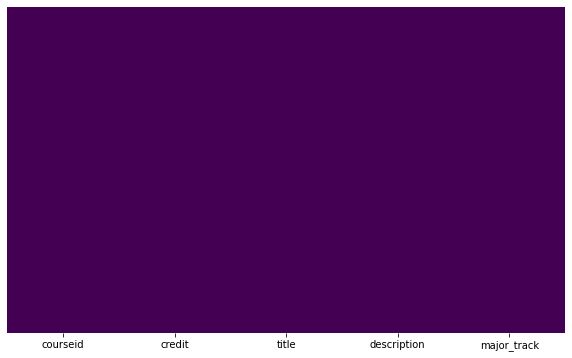

In [7]:
# rename
dku_trk_crs_df = df_combined
dku_trk_crs_df = dku_trk_crs_df.rename(columns={'ID': 'courseid', 'Title': 'title', 'Description': 'description', 'Credit': 'credit'})

# clean missing values
des = dku_trk_crs_df['description'].replace(np.nan, "to be updated", regex=True)

# clean noise
dku_trk_crs_df['description'] = [i.replace('\t\t\t\t\t\t\t','') for i in des]

plt.figure(figsize=(10, 6))
sns.heatmap(dku_trk_crs_df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [8]:
# Set disciplines/fields of study of the courses

disc = [i[:-4] for i in dku_trk_crs_df['courseid'].tolist()]
dku_trk_crs_df['discipline'] = disc

In [9]:
# "merge" rows by same value in a column (major_track)
# Reference: https://pandas.pydata.org/docs/user_guide/merging.html; https://www.geeksforgeeks.org/concatenate-strings-from-several-rows-using-pandas-groupby/

# concatenate the string
dku_trk_crs_df['major_track'] = dku_trk_crs_df.groupby(['courseid'])['major_track'].transform(lambda x : ';'.join(x))

# drop duplicate data
dku_trk_crs_df = dku_trk_crs_df.drop_duplicates()   


In [10]:
major_track_list = []
for i in (dku_trk_crs_df['major_track']):
    print(type(i))
    print(i.split(";"))
    major_track_list.append(i.split(";"))

<class 'str'>
['applied-mathematics-and-computational-sciences-math', 'behavioral-science-with-tracks-in-psychology-and-neuroscience', 'computation-and-design-with-tracks-in-computer-science-digital-media-and-social-policy', 'data-science', 'environmental-science-with-tracks-in-biogeochemistry-biology-chemistry-and-public-policy', 'global-china-studies-with-tracks-in-chinese-history-economics-philosophy-political-science-and-religious-studies', 'global-health-with-tracks-in-biology-and-public-policy', 'institutions-and-governance-with-tracks-in-economics-political-science-and-public-policy', 'materials-science-with-tracks-in-chemistry-and-physics', 'molecular-bioscience-with-tracks-in-biogeochemistry-biophysics-cell-and-molecular-biology-genetics-and-genomics', 'political-economy-with-tracks-in-economics-political-science-and-public-policy']
<class 'str'>
['applied-mathematics-and-computational-sciences-math', 'behavioral-science-with-tracks-in-psychology-and-neuroscience', 'computatio

In [11]:
dku_trk_crs_df['major_track'] = major_track_list
dku_trk_crs_df['major_track'][10]

['applied-mathematics-and-computational-sciences-math']

1.3 *Check completeness, integrate, and save data*

- all courses: dku_crs_df
- courses required by major tracks: dku_trk_crs_df

there might be mistakes。 E.g., drop_duplicate cannot deal with items with several different properties while others are the same

In [12]:
# check duplicate
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list


crs_list_uni = unique(df_combined['ID'])
print(len(crs_list_uni),len(dku_crs_df['ID']),len(unique(dku_crs_df['ID'])))
crs_list_uni
dku_crs_df['ID']

545 546 545


0        MATH 101
1        MATH 105
2        PHYS 121
3        CHEM 110
4        BIOL 110
          ...    
541       LIT 301
542     USTUD 301
543       LIT 305
544    PUBPOL 216
545    PUBPOL 212
Name: ID, Length: 546, dtype: object

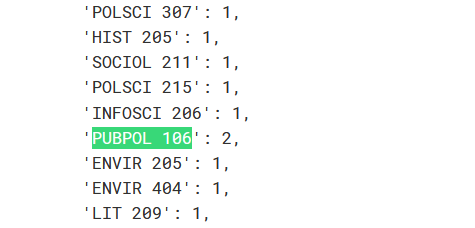

In [13]:

from collections import Counter
check = dict(Counter(dku_trk_crs_df['courseid']))
# check
[x for x in crs_list_uni if x not in dku_trk_crs_df['courseid'].tolist()]
[x for x in dku_trk_crs_df['courseid'].tolist() if x not in crs_list_uni]
# len( dku_trk_crs_df['courseid'].tolist())
# for  dku_trk_crs_df['courseid']
check_list = list(check.values())
print(check_list)
odd_id = list(check)[check_list.index(2)]


def indices(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

odd_idc = indices(dku_trk_crs_df['courseid'].tolist(), odd_id)
odd_idc
for idx in odd_idc:
    print(idx)
#     print(idx, dku_trk_crs_df.loc[idx])

# dku_trk_crs_df.loc[172]

# deal with this mistake in data
dku_trk_crs_df['title'][136] = "Urbanizing China: Spatial and Social Dynamics in Chinese Cities"
dku_trk_crs_df = dku_trk_crs_df.drop(index=dku_trk_crs_df.index[172])
# print(dku_trk_crs_df.drop(index=dku_trk_crs_df.index[172]))
check_after = dict(Counter(dku_trk_crs_df['courseid']))
check_after.values()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Great!

In [15]:
# save
dku_trk_crs_df.to_csv("X:/dataset/duke_dku/dku_courses/dku_track_course.csv", encoding='utf-8', index=False)

### 2. Duke, DKU scholar data

In [3]:
dku_faculty_df = pd.read_csv("X:/dataset/duke_dku/duke_scholar/dku_faculty_basic.csv")

In [32]:
import re

dku_faculty_df["pbl_ttl_combined"] = ""

for i in range(len(dku_faculty_df["pbl_ttl_combined"])):
    dku_faculty_df["pbl_ttl_combined"][i] = re.sub(r'[^\w\s]', '', dku_faculty_df["pub_titles"][i])


dku_faculty_df["pbl_ttl_combined"]

<ipython-input-32-b0e9944830be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dku_faculty_df["pbl_ttl_combined"][i] = re.sub(r'[^\w\s]', '', dku_faculty_df["pub_titles"][i])


0                                                       
1                                                       
2                                                       
3                                                       
4      Association between indoor ventilation frequen...
                             ...                        
179                                                     
180                                                     
181    Testing legislator responsiveness to citizens ...
182    The price of persecution The longterm effects ...
183    Confucian Ethics and The Practical Value of Ro...
Name: pbl_ttl_combined, Length: 184, dtype: object

## Exploratory

Actually it would be more efficient to use Tablueau. So I remove exploratory vis code

# Create corpus

In [16]:
# course descriptions
corpus_crs_des_all = " ".join(des for des in dku_trk_crs_df['description'])
corpus_crs_des_all

'This course offers an introduction to Calculus, a subject that is the foundation for a large part of modern mathematics and has countless applications across the sciences and beyond. The course covers the fundamental Calculus concepts (limits, continuity, differentiation, integration) and explores related applications. The treatment of these concepts assumes no prior knowledge of Calculus. Recommended for students who have not had a previous (high-school level) Calculus course. Students who have had such a Calculus course are recommended to take MATH 105 instead. Calculus is the foundation for a large part of modern mathematics and has countless applications across the sciences and beyond. This course covers the fundamental Calculus concepts (limits, continuity, differentiation, integration) and explores related applications. The treatment of these topics is rigorous and it involves basic principles of mathematical logic and epsilon-delta language. Recommended for students who have ha

### preprocessing


- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Stemming
- Lemmatization


In [ ]:
# tokenize and clean

import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


import spacy
from spacy.lang.en import English
parser = English()

def tokenize(text): 
    text = remove_punctuation(text)
    text = re.sub('[0-9]+', '', text)
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'): # Remove Emails
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)

    return lda_tokens

# use NLTK’s Wordnet to find the meanings of words, synonyms, antonyms, and more. 
# use WordNetLemmatizer to get the root word.
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

'''note: do we want stemming?'''
def lemmatize_stemming(word):
    return stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v'))

# Constructing Custom Stop Word Lists
'''Note: 
here we assume that removing these words will not influence topic modeling, 
i.e., only discipline-related words are counted
'''
add_stopwords = ["course","student",
                 "include","cover","instead",
                 "topic","problem","issue",
                 "learn","study","examine","explore","focus",
                 "apply","use"]

from gensim.parsing.preprocessing import STOPWORDS
my_stopwords = STOPWORDS.union(set(add_stopwords))

# The function of preprocessing text for LDA
def prep_corpus_lda(text, my_stopwords):
    tokens = tokenize(text)
    # be aware that the order here matters: stopwords should be root words
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if token not in my_stopwords]
    tokens = [token for token in tokens if len(token) > 2] # after checking, we found words whose length are less than 3 are meaningless 
    return tokens


# n_gram model
'''
Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. 
The two important arguments to Phrases are min_count and threshold. 
The higher the values of these param, the harder it is for words to be combined to bigrams.
https://radimrehurek.com/gensim/models/phrases.html
https://stats.stackexchange.com/questions/176372/topic-modeling-lda-and-n-grams

actually we can lemma before apply n_gram...
https://stackoverflow.com/questions/47219389/compute-word-n-grams-on-original-text-or-after-lemma-stemming-process
'''
from gensim.models import Phrases
from gensim.models.phrases import Phraser 

def test_ngram(corpus_list, N_GRAM):
    
    # Load corpus and train a model.
    '''be careful to choose the traning data!'''
#     traning_data = [item for sublist in corpus_list for item in sublist]
    bigram_phrase = gensim.models.Phrases(corpus_list, min_count=2, threshold=5) 
    trigram_phrase = gensim.models.Phrases(bigram_phrase[corpus_list], threshold=5)  
    
    # Use the model to detect phrases in certian texts. let's transform multiple sentences at once.
    corpus_ngrams_list = []
    for item in corpus_list:
        if N_GRAM == 2:
            corpus_ngrams = bigram_phrase[item]    
        if N_GRAM == 3:
            corpus_ngrams = trigram_phrase[item]  
        corpus_ngrams_list.append(corpus_ngrams)
    
    return corpus_ngrams_list



# function

def prp_corpus(corpus_list):
    prp_list = []
    for text in corpus_list:
        tokens = prep_corpus_lda(text, my_stopwords)
        # since stopwords are removed, it may result in empty items
        if len(tokens) > 0:
            prp_list.append(tokens)

    # check
    for text in prp_list:
        if len(text) < 1:
            print("Error! Empty:",text)

    return prp_list

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhenj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# prepare each items in the text list
# dku_trk_crs_df = pd.read_csv("X:/dataset/duke_dku/dku_courses/dku_track_course.csv")
# dku_crs_des_list = prp_corpus(dku_trk_crs_df['description'])


dku_fct_pbtl_list =  prp_corpus(dku_faculty_df["pbl_ttl_combined"])
dku_fct_pbtl_list
# dku_crs_des_list

[['association',
  'indoor',
  'ventilation',
  'frequency',
  'cognitive',
  'function',
  'communitydwelling',
  'older',
  'adult',
  'china',
  'result',
  'chinese',
  'longitudinal',
  'healthy',
  'longevity',
  'survey',
  'association',
  'year',
  'lipid',
  'variability',
  'young',
  'adulthood',
  'midlife',
  'cognitive',
  'function',
  'brain',
  'integrity',
  'association',
  'retail',
  'environment',
  'neighborhood',
  'socioeconomic',
  'status',
  'mortality',
  'communitydwelling',
  'older',
  'adult',
  'cardiovascular',
  'health',
  'association',
  'early',
  'life',
  'circumstances',
  'depressive',
  'symptom',
  'chinese',
  'older',
  'adult',
  'result',
  'china',
  'health',
  'retirement',
  'longitudinal',
  'early',
  'life',
  'circumstances',
  'depression',
  'association',
  'allostatic',
  'load',
  'mortality',
  'chinese',
  'older',
  'adult',
  'chinese',
  'longitudinal',
  'health',
  'longevity',
  'subclinical',
  'vascular',
  'dise

In [ ]:
# compare ngrams

dku_crs_des_flist = [item for sublist in dku_crs_des_list for item in sublist]
# print(dku_crs_des_flist)
dku_crs_des_slist = dku_crs_des_list
dku_crs_des_bilist = test_ngram(dku_crs_des_list,2)
dku_crs_des_trilist = test_ngram(dku_crs_des_list,3)

# dif_tri_nbi = dif_bi_ntri = dif_tri_nsgl = dif_tri_nsgl = dif_sgl_ntri = dif_sgl_nbi  = []
# dif_t_b = dif_s_b = dif_t_s = []

print(len(dku_crs_des_bilist),len(dku_crs_des_trilist), len(dku_crs_des_slist))

from collections import Counter
tri_dic,bi_dic,sgl_dic = dict(Counter(dku_crs_des_trilist[133])),dict(Counter(dku_crs_des_bilist[133])),dict(Counter(dku_crs_des_slist[133]))
# print(tri_dic,bi_dic,sgl_dic)

from deepdiff import DeepDiff
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(DeepDiff(sgl_dic,bi_dic))
pp.pprint(DeepDiff(sgl_dic,tri_dic))
pp.pprint(DeepDiff(bi_dic,tri_dic))

# it seems like bigrams are more reseaonable
# however, after testing on LDA, we found that bigrams model doesn't work

# dku_crs_des_list = dku_crs_des_bilist
dku_crs_des_list = dku_crs_des_slist


544 544 544
{'dictionary_item_added': [root['institution_economic'], root['pay_particular'], root['gender_race']],
 'dictionary_item_removed': [root['economic'], root['pay'], root['particular'], root['gender'], root['race']],
 'values_changed': {"root['institution']": {'new_value': 1, 'old_value': 2}}}
{'dictionary_item_added': [root['economic_development'], root['particular_attention']],
 'dictionary_item_removed': [root['economic'], root['development'], root['particular'], root['attention']]}
{'dictionary_item_added': [root['economic_development'], root['pay'], root['particular_attention'], root['gender'], root['race']],
 'dictionary_item_removed': [root['institution_economic'], root['development'], root['pay_particular'], root['attention'], root['gender_race']],
 'values_changed': {"root['institution']": {'new_value': 2, 'old_value': 1}}}


In [35]:
dku_fct_pbtl_list[1]

['talking',
 'experience',
 'perspective',
 'transformation',
 'shortterm',
 'abroad',
 'program',
 'transformative',
 'learning',
 'times',
 'global',
 'crisis',
 'reflection',
 'collaborative',
 'working',
 'practice',
 'hearts',
 'mind',
 'goalorientation',
 'intercultural',
 'communicative',
 'competence',
 'rotc',
 'cadet',
 'learning',
 'critical',
 'language',
 'language',
 'endangerment',
 'diversity',
 'specificity',
 'native',
 'american',
 'language',
 'oklahoma',
 'rotc',
 'learner',
 'arabic',
 'change',
 'perception',
 'self',
 'doe',
 'studying',
 'abroad',
 'affect',
 'anyways',
 'interdisciplinary',
 'review',
 'research',
 'rethink',
 'orientation',
 'innovation',
 'collaboration',
 'language',
 'culture',
 'camp',
 'sinous',
 'university']

# Models & Algorithms

Data retrieve, preprocessing, network extraction, normalization, mapping, analysis and visualization

## 1. Topic modeling for course descriptions
Research question:
- track and discipilne



Some good blogs for explanation:

https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [4]:
# libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import nltk
from nltk.corpus import stopwords

- NLTK is used primarily for general NLP tasks (tokenization, POS tagging, parsing, etc.)
- Sklearn is used primarily for machine learning (classification, clustering, etc.)
- Gensim is used primarily for topic modeling and document similarity; Gensim also has word2vec and sentence2vec also implemented.
- Spacy for dependency parsing and more.

source: https://www.quora.com/When-is-better-to-use-NLTK-vs-Sklearn-vs-Gensim

- NLTK is specialized on gathering and classifying unstructured texts. If you need e.g. a POS-tagger, lemmatizer, dependeny-analyzer, etc, you'll find them there, and sometimes nowhere else. It offers a quit broad range of tools developped mainly in academic research. But: most often it is not very well optimized - involving NLTK libraries often means to accept a huge performance loss. If you do text-gathering or -preprocessing, its fine to begin with - until you found some faster alternatives.

- SKLEARN offers a very systematic, efficient framework for machine-learning, analyzing, ensemble methods, evaluation and validation, and hyper-parameter optimization. It is very well documented (with a lot of ready to use recipes and examples), well optimized, and covers a broad range of ‘state of the art’ machine learning and statistical methods, the latter especially for evaluation purposes. Due to its integrity, it is ideal to start learning ‘machine learning’.

- GENSIM is a very well optimized, but also highly specialized, library for doing jobs in the periphery of "WORD2VEC". That is: it offers an easy, surpringly well working and swift AI-approach to unstructured raw texts, based on a shallow neural network. If you are interested in prodution, or in getting deeper insights into neural networks, you might also have a look on TensorFlow,
which offers a mathematically more generalized model, yet to be paid by some ‘unpolished’ performance and scalability issues by now.

My conclusion Although considerably overlapping, I personally prefer using NLTK for the pre-processing of natural text (i.e., gathering, wrangling, stemming, POS-tagging, filtering and ‘noise’-reduction), GENSIM as kind of base platform (for autoencoding, semantic (topics) and syntactic (sequence) pattern- and as such for similiarity- recognition, dimensionality reduction, and for multilabel classification), and SKLEARN, which easily can be mixed up with NLTK and GENSIM, for third step evaluation / ensembling / optimizing / processing issues.

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

C:\Users\zhenj\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### LDA on BoW corpus
Use Gensim

**Step1: create bow corpus**




In [44]:
# Create Dictionary
'''
dictionary: dku_crs_des_dic
corpus: corpus_dku_crs_des
'''
import gensim
from gensim import corpora
import pickle



def corpus_bow(corpus_list, name):

    dictionary = corpora.Dictionary(corpus_list)
    # for i in dku_crs_des_dic:
    #     if "_" in dku_crs_des_dic[i]:
    #         print(i,dku_crs_des_dic[i])

    # filter_extremes
    '''Filter out tokens that appear in terms of
    - a threshold filtering out number of occurrence of the tokens
    - a percentage that represents the portion of a word in total corpus size. e.g. filter out words appearing in more than 10% of all documents.
    - after the above two steps, keep only the first 100000 most frequent tokens.
    '''
    dictionary.filter_extremes(no_below=2, no_above=0.7, keep_n=100000)

    # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
    corpus_bow_after = [dictionary.doc2bow(text) for text in corpus_list] # it is a bow_corpus, with word index and its frequencies in the doc

    

    # corpus_dku_crs_des_test = corpus_dku_crs_des[133]
    # for i in range(len(corpus_dku_crs_des_test)):
    #     print("Word {} (\"{}\") appears {} time.".format(corpus_dku_crs_des_test[i][0], dictionary[corpus_dku_crs_des_test[i][0]],corpus_dku_crs_des_test[i][1]))



    # save the dictionary and corpus for future use

    pickle.dump(corpus_bow_after, open(name + '_bow.pkl', 'wb')) # 'r' for reading, 'w' for writing (truncating the file if it already exists), and 'a' for appending
    dictionary.save(name + '_dic.gensim')

    return corpus_bow_after, dictionary



In [45]:
# corpus_list = dku_crs_des_list
# name = "dku_crs_des"

# corpus_dku_crs_des, dku_crs_des_dic =  corpus_bow(corpus_list, name)

corpus_list = dku_fct_pbtl_list
name = "dku_fct_pbtl"
dku_fct_pbtl_bow, dku_fct_pbtl_dic =  corpus_bow(corpus_list, name)
dku_fct_pbtl_bow

# print the BoW corpus
# [[(dku_fct_pbtl_dic[id], freq) for id, freq in cp] for cp in dku_fct_pbtl_bow[0]]

TypeError: cannot unpack non-iterable int object

**Step2: build and visualize LDA model**

https://radimrehurek.com/gensim/models/ldamulticore.html

Think: optimize the model

Reference code:

https://stackoverflow.com/questions/50805556/understanding-parameters-in-gensim-lda-model

https://miningthedetails.com/blog/python/lda/GensimLDA/

Several options of num_topics:
- The amount of topics equals the amount of tracks
- The amount of topics equals the amount of first level disciplines (NS, SS, MA, H)

In [81]:
# perform the LDA decomposition, define the number of topics
from gensim.test.utils import datapath
# functoin of pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

'''pyLDAvis
pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. 
The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.
'''

def lda_modle_vis(corpus, corpus_name, dictionary, dictionary_name, NUM_TOPICS):
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=NUM_TOPICS,
                                            id2word=dictionary, 
                                            passes=10)
    
    #save the lda model
    ldamodel_name = "ldamodel_{}_{}.gensim".format(corpus_name,str(NUM_TOPICS))
    lda_model.save(ldamodel_name)
    
    # print topics
    topics = lda_model.print_topics(num_words=15)
    topics = [t[1].split(" + ") for t in topics]
    topic_df = pd.DataFrame(topics)
    topic_df.to_csv(ldamodel_name+"_topic.csv", encoding='utf-8', index=False)

    for item in topics:
        item = [re.sub('[^A-Za-z0-9]+', '', t) for t in item]
        item = [re.sub(r'[^\w\s]', '', t) for t in item]
    topic_df = pd.DataFrame(topics)
    topic_df.to_csv(ldamodel_name+"_topic_spl.csv", encoding='utf-8', index=False)

    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

    pyLDAvis.save_html(lda_vis, "ldamodel_{}_{}.html".format(corpus_name,str(NUM_TOPICS)))

    

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:

corpus, dictionary = dku_fct_pbtl_bow, dku_fct_pbtl_dic
corpus_name, dictionary_name = "dku_fct_pbtl_bow", "dku_fct_pbtl_dic"
# corpus, dictionary = corpus_dku_crs_des, dku_crs_des_dic
# corpus_name, dictionary_name = "corpus_dku_crs_des", "dku_crs_des_dic"

NUM_TOPICS = 7
lda_modle_vis(corpus, corpus_name, dictionary, dictionary_name, NUM_TOPICS)

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
topic_df = pd.read_csv("ldamodel_dku_fct_pbtl_bow_7.gensim_topic_spl.csv")
topic_df

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"0.027*""analysis""","0.021*""reliability""","0.019*""software""","0.017*""modeling""","0.016*""model""","0.015*""performance""","0.011*""stochastic""","0.011*""network""","0.010*""availability""","0.010*""water""","0.010*""groundwater""","0.009*""net""","0.008*""approach""","0.007*""markov""","0.007*""gas"""
1,"0.017*""circuit""","0.014*""model""","0.014*""modeling""","0.013*""analysis""","0.011*""efficient""","0.008*""data""","0.007*""performance""","0.007*""statistical""","0.007*""nucleus""","0.007*""marine""","0.006*""analog""","0.006*""bayesian""","0.006*""management""","0.005*""rat""","0.005*""sea"""
2,"0.030*""china""","0.021*""health""","0.011*""analysis""","0.010*""air""","0.010*""exposure""","0.009*""adult""","0.007*""effects""","0.007*""model""","0.007*""chinese""","0.007*""disease""","0.007*""rural""","0.006*""association""","0.006*""pollution""","0.006*""method""","0.006*""equation"""
3,"0.010*""climate""","0.010*""risk""","0.010*""response""","0.010*""plant""","0.009*""china""","0.008*""regulation""","0.008*""policy""","0.008*""change""","0.008*""carbon""","0.008*""environmental""","0.008*""analysis""","0.008*""cameroon""","0.007*""effects""","0.006*""regulatory""","0.006*""africa"""
4,"0.019*""china""","0.014*""religion""","0.013*""social""","0.011*""political""","0.010*""aerosol""","0.010*""medium""","0.008*""nature""","0.006*""chinese""","0.006*""doe""","0.006*""lake""","0.005*""philosophy""","0.005*""american""","0.005*""new""","0.005*""ecological""","0.005*""internet"""
5,"0.025*""learning""","0.024*""network""","0.012*""novel""","0.011*""data""","0.008*""base""","0.008*""algorithm""","0.008*""analysis""","0.007*""deep""","0.007*""classification""","0.007*""machine""","0.007*""domain""","0.007*""prediction""","0.007*""wireless""","0.007*""approach""","0.007*""selection"""
6,"0.020*""imaging""","0.017*""radiation""","0.016*""therapy""","0.015*""treatment""","0.015*""spect""","0.013*""image""","0.011*""radiotherapy""","0.010*""planning""","0.010*""technique""","0.010*""stereotactic""","0.009*""conebeam""","0.009*""evaluation""","0.009*""onboard""","0.009*""target""","0.008*""lung"""


In [25]:
lda_modle_vis(corpus_dku_crs_des, "corpus_dku_crs_des", dku_crs_des_dic, "dku_crs_des_dic", 3)
lda_modle_vis(corpus_dku_crs_des, "corpus_dku_crs_des", dku_crs_des_dic, "dku_crs_des_dic", 7)

lda_modle_vis(corpus_dku_crs_des, "corpus_dku_crs_des", dku_crs_des_dic, "dku_crs_des_dic", len(track_list))

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.010*"world" + 0.010*"global" + 0.010*"social" + 0.009*"history" + 0.009*"political" + 0.008*"cultural" + 0.008*"american" + 0.007*"historical" + 0.006*"development" + 0.006*"culture"')
(1, '0.009*"medium" + 0.009*"social" + 0.009*"political" + 0.008*"health" + 0.007*"theory" + 0.007*"human" + 0.007*"economic" + 0.006*"research" + 0.006*"science" + 0.006*"policy"')
(2, '0.011*"major" + 0.011*"method" + 0.009*"model" + 0.008*"data" + 0.008*"seminar" + 0.008*"analysis" + 0.008*"knowledge" + 0.007*"discipline" + 0.007*"structure" + 0.006*"interdisciplinary"')
(0, '0.014*"political" + 0.010*"world" + 0.009*"cultural" + 0.009*"policy" + 0.008*"history" + 0.007*"culture" + 0.007*"migration" + 0.007*"analysis" + 0.007*"american" + 0.006*"medium"')
(1, '0.009*"religious" + 0.008*"disease" + 0.008*"understanding" + 0.008*"human" + 0.008*"world" + 0.006*"model" + 0.006*"learning" + 0.006*"concept" + 0.006*"war" + 0.006*"life"')
(2, '0.012*"network" + 0.009*"theory" + 0.009*"political" + 0.

In [32]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()



C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
corpus = corpus_dku_crs_des
dictionary = dku_crs_des_dic
NUM_TOPICS = 7
lda_model = gensim.models.LdaMulticore(corpus, num_topics=NUM_TOPICS,
                                        id2word=dictionary, 
                                        passes=10)
sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = len(corpus))    

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: not enough values to unpack (expected 3, got 1)

ValueError: Image size of 3200x82688 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3200x82688 with 544 Axes>

## 2. Coocurrence network

Data: 
1. course descriptions
2. (possible) topics in course descriptions

Co_word matix:
- in docs were word A occurs, word B occurs x times

use CountVectorizer (nltk)

In [ ]:
# Create one list using many lists
import nltk
from nltk import bigrams
import itertools

def generate_co_occurrence_matrix(corpus_tokenized):
    vocab_index = {word: i for i, word in corpus_tokenized}
    
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))

    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)

    # return the matrix and the index
    return co_occurrence_matrix, vocab_index



In [ ]:
text_data = dku_crs_des_list

data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)

data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
print(data_matrix)

NameError: name 'dku_crs_des_list' is not defined

use genism
1. create on corpus (all preprocessed terms/tokens)

In [ ]:
# create coword matrix

from gensim.matutils import corpus2csc
def co_word_mat(bow_corpus):
    word_doc_mat = corpus2csc(bow_corpus) # doc-word matrix
    word_word_mat = np.dot(word_doc_mat, word_doc_mat.T) # => word_word_matrix
    # note that it is compressed sparse format
    return word_word_mat

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# corpus_crs_des_all[0]
coword_mat = co_word_mat(corpus_crs_des_all).toarray()

coword_mat.shape

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4223, 4223)

In [ ]:
len(dku_crs_des_flist)

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


45007


2. create on topics (identified by LDA)

*note that topic keywords depend on topic numbers*

In [ ]:
# For each topic, we will explore the words occuring in that topic and its relative weight.
lda_model_test = gensim.models.LdaMulticore(corpus_crs_des_all, num_topics=7, id2word=dictionary, passes=10)

for idx, topic in lda_model_test.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

In [ ]:
# then store all the topic keywords into dictionary {{doc, (keyword, count)}}
# or directly create doc-term cooccerrence matrix

In [ ]:
# create doc-doc cooccerrence matrix

In [ ]:
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_model_test]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

In [ ]:
# for test: find lists with multiple duplicates

# set(a) & set(b) cannot work since it automatically remove all duplicates
for i in corpus_crs_des_all:
    idx = corpus_crs_des_all.index(i)
    for j in i:
        if j[1] > 3:
            print(j,idx,i)
            print()
            
# print(dku_crs_des_list)
a = dku_crs_des_list[59]
b = dku_crs_des_list[60]
# print(a, b)
dpl_list = [x for x in a if x in b]
dpl_set = set(dpl_list)
print(dpl_list, dpl_set)

from collections import Counter
cnt = dict(Counter(dpl_list))
cnt


(2, 5) 0 [(0, 2), (1, 1), (2, 5), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]

(62, 4) 2 [(3, 3), (8, 2), (13, 1), (20, 1), (25, 2), (28, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 4), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 2)]

(25, 5) 6 [(3, 1), (8, 1), (9, 1), (13, 1), (25, 5), (70, 1), (71, 1), (72, 1), (143, 1), (144, 1), (145, 1), (147, 1), (151, 1), (152, 1), (153, 2), (154, 1), (155, 1), (156, 1), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (

In [ ]:
# fucntion for building doc-doc co-occurrence network

from collections import Counter

def doc_cowd_mat(corpus_list):
    n = len(corpus_list)
    # initialize matrix
    mat = np.zeros((n,n)) # integer
    dpl_dic = {}
    
    for i in range(n):
        for j in range(n):
            dpl_list = [x for x in corpus_list[i] if x in corpus_list[j]]
            cnt_dic = dict(Counter(dpl_list)) # the specifc dic of co-occurrences, "word": count
            cnt = sum(cnt_dic.values()) # the number of co-occurrences
            mat[i][j] = cnt
            dpl_dic[(i,j)] = cnt_dic
        
        return mat, dpl_dic
#         print(cnt,cnt_dic)

In [ ]:
crsdes_doc_cowd_mat, dpl_dic = doc_cowd_mat(dku_crs_des_list)
# check
print(mat.shape)
print(len(dku_crs_des_list))
print(len(dku_trk_crs_df["courseid"]))

(545, 545)
545
546


In [ ]:
dku_trk_crs_df["courseid"]

0         MATH 101
1         MATH 105
2         PHYS 121
3         CHEM 110
4         BIOL 110
           ...    
1046       LIT 301
1047     USTUD 301
1048       LIT 305
1084    PUBPOL 216
1087    PUBPOL 212
Name: courseid, Length: 546, dtype: object

In [ ]:
# add header
tokens_list = [item for sublist in dku_crs_des_list for item in sublist]


crsdes_doc_cowd_mat = pd.DataFrame(crsdes_doc_cowd_mat, index=tokens_list, columns=tokens_list)
crsdes_doc_cowd_mat.to_csv('crsdes_doc_cowd_mat.csv', index=True, header=True, sep=' ')

ValueError: Shape of passed values is (545, 545), indices imply (21483, 21483)

In [38]:
import pickle

with open("nested_list_dku.pkl", 'rb') as f:
    data = pickle.load(f)

data

C:\Users\zhenj\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'nested_list_dku.pkl'